# importando bibliotecas

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy

# carregando dados

In [34]:
#Lendo os dados com pandas 
dados = pd.read_csv("winequality-red.csv")

#exibindo os cinco primeiros do dataset
dados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [35]:
# Adicionando nome ID na primeira coluna 
dados.rename_axis("ID", axis = 'columns', inplace = True)
dados.head()

ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Distribuições de frequência com variáveis quantitativas

In [36]:
#variável quantitativa do pH
dados.pH.min()

2.74

In [37]:
dados.pH.max()

4.01

In [38]:
classes = [0, 3.3, 3.6, 6.9, 7.1, 14]
labels = ['Ácido Azedo', 'Ácido Ideal', 'Ácido' , 'Neutro', 'Alcalino']

pd.cut(x = dados.pH,bins = classes,labels = labels, include_lowest = True )

0       Ácido Ideal
1       Ácido Azedo
2       Ácido Azedo
3       Ácido Azedo
4       Ácido Ideal
           ...     
1594    Ácido Ideal
1595    Ácido Ideal
1596    Ácido Ideal
1597    Ácido Ideal
1598    Ácido Ideal
Name: pH, Length: 1599, dtype: category
Categories (5, object): ['Ácido Azedo' < 'Ácido Ideal' < 'Ácido' < 'Neutro' < 'Alcalino']

In [39]:
frequencia = pd.value_counts(
    pd.cut(
        x = dados.pH,
        bins = classes,
        labels = labels,
        include_lowest = True
    )
)

percentual = pd.value_counts(
    pd.cut(
        x = dados.pH,
        bins = classes,
        labels = labels,
        include_lowest = True
    ), normalize = True
) * 100

dist_freq_pH = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)

dist_freq_pH.rename_axis('pH', axis= 'columns', inplace = True)

dist_freq_pH.sort_index(ascending = True, inplace = True)

dist_freq_pH

pH,Frequência,Porcentagem (%)
Ácido Azedo,783,48.968105
Ácido Ideal,768,48.030019
Ácido,48,3.001876
Neutro,0,0.000000
Alcalino,0,0.000000


In [40]:
#número de registros e a quantidade de variáveis
n = dados.shape
n

(1599, 12)

In [41]:
#para pegar só o número de registros
n = dados.shape[0]
n

1599

In [42]:
#descobrir o número de classes de amplitude fixa por meio da regra de Sturges

k = 1 + (10 /3) * np.log10(n) 
k 

11.679494879154115

In [43]:
#arredondando  a variável k
k = k.round(0)
k

12.0

In [44]:
k = int(k.round(0))
k

12

In [45]:
#utilizando value_counts() para distribuição de frequencia
pd.value_counts(
    pd.cut(
        x = dados.density,
        bins = 12,
        include_lowest = True
    )
)

(0.996, 0.997]    419
(0.997, 0.998]    397
(0.995, 0.996]    272
(0.998, 0.999]    182
(0.999, 1.0]      108
(0.993, 0.995]    105
(0.992, 0.993]     45
(1.0, 1.001]       32
(0.991, 0.992]     13
(1.001, 1.003]      9
(1.003, 1.004]      9
(0.989, 0.991]      8
Name: density, dtype: int64

In [46]:
#para ordenar do menor ao maior registro e adicionar os atributos frequencia e percentual para gerar novo DataFrame
frequencia = pd.value_counts(
    pd.cut(
        x = dados.density,
        bins = 12,
        include_lowest = True
    ),
    sort = False
)

percentual = pd.value_counts(
    pd.cut(
        x = dados.density,
        bins = 12,
        include_lowest = True
    ),
    sort = False,
    normalize = True
)


dist_freq_quantitativas_amplitude_fixa = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_amplitude_fixa

,Frequência,Porcentagem (%)
"(0.989, 0.991]",8,0.005003
"(0.991, 0.992]",13,0.008130
"(0.992, 0.993]",45,0.028143
"(0.993, 0.995]",105,0.065666
"(0.995, 0.996]",272,0.170106
"(0.996, 0.997]",419,0.262039
"(0.997, 0.998]",397,0.248280
"(0.998, 0.999]",182,0.113821
"(0.999, 1.0]",108,0.067542
"(1.0, 1.001]",32,0.020013


In [47]:
dist_freq_quantitativas_amplitude_fixa.rename_axis('density', axis= 'columns', inplace = True)
dist_freq_quantitativas_amplitude_fixa

density,Frequência,Porcentagem (%)
"(0.989, 0.991]",8,0.005003
"(0.991, 0.992]",13,0.008130
"(0.992, 0.993]",45,0.028143
"(0.993, 0.995]",105,0.065666
"(0.995, 0.996]",272,0.170106
"(0.996, 0.997]",419,0.262039
"(0.997, 0.998]",397,0.248280
"(0.998, 0.999]",182,0.113821
"(0.999, 1.0]",108,0.067542
"(1.0, 1.001]",32,0.020013


# Medidas de tendencia central

In [48]:
#cálculo da média
dados.alcohol.mean()

10.422983114446502

In [49]:
dados.density.mean()

0.9967466791744831

In [50]:
dados['volatile acidity'].mean()

0.5278205128205131

In [51]:
dados['citric acid'].mean()

0.2709756097560964

In [52]:
#calculo mediana
dados.alcohol.median()

10.2

In [53]:
dados.density.median()

0.99675

In [54]:
dados['volatile acidity'].median()

0.52

In [55]:
dados['citric acid'].median()

0.26

In [56]:
n = dados.shape[1]
n

12

In [57]:
# cálculo da moda
dados.alcohol.mode()

0    9.5
Name: alcohol, dtype: float64

In [58]:
dados.density.mode()

0    0.9972
Name: density, dtype: float64

In [59]:
dados['volatile acidity'].mode()

0    0.6
Name: volatile acidity, dtype: float64

In [60]:
dados['citric acid'].mode()

0    0.0
Name: citric acid, dtype: float64

# Relação entre as medidas de tendência central e histogramas

C:\Users\adson.damasceno\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências - Densidade'}, xlabel='g/mL'>

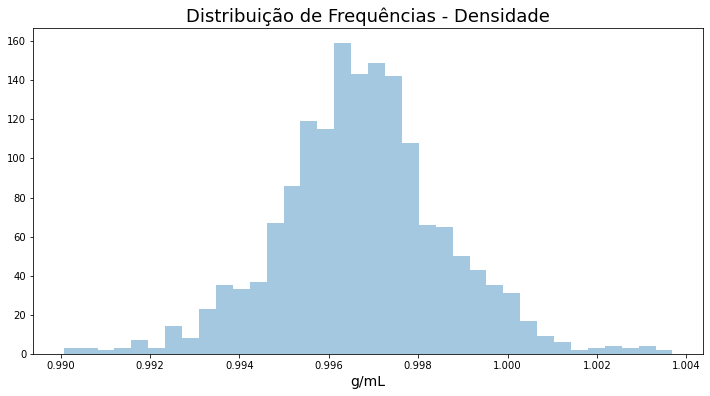

In [61]:
ax = sns.distplot(dados.density, kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Densidade', fontsize=18)
ax.set_xlabel('g/mL', fontsize=14)
ax

<AxesSubplot:title={'center':'Distribuição de Frequências - Densidade  com KDE'}, xlabel='g/mL', ylabel='Density'>

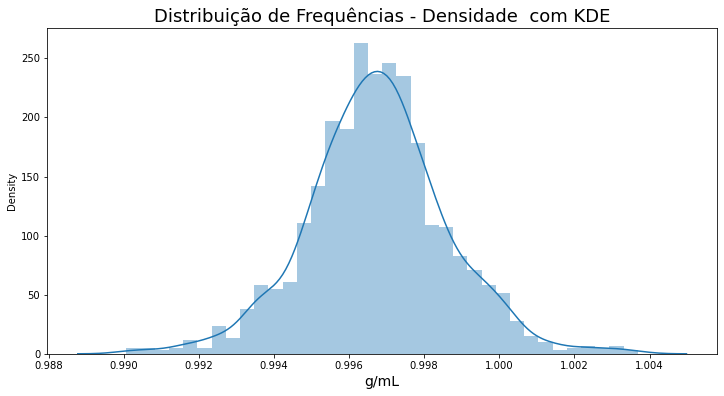

In [62]:
# com KDE
ax = sns.distplot(dados.density)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Densidade  com KDE', fontsize=18)
ax.set_xlabel('g/mL', fontsize=14)
ax

C:\Users\adson.damasceno\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='density', ylabel='Density'>

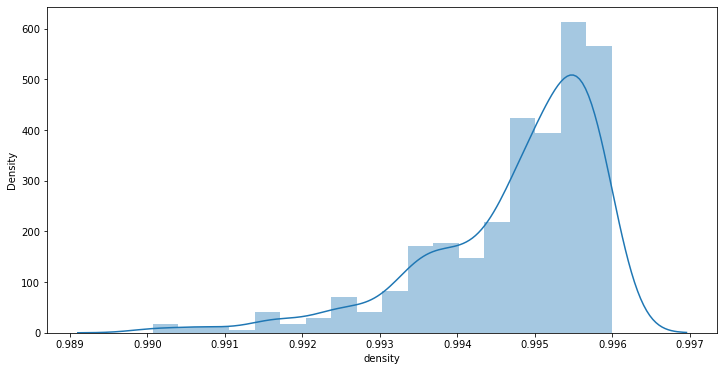

In [63]:
ax = sns.distplot(dados.query('density < 0.996').density)
ax.figure.set_size_inches(12, 6)
ax

In [64]:
Moda = dados.density.mode()[0]
Moda

0.9972

In [65]:
Mediana = dados.density.median()
Mediana

0.99675

In [66]:
Media = dados.density.mean()
Media

0.9967466791744831

In [67]:
Moda > Mediana > Media

True

C:\Users\adson.damasceno\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='citric acid', ylabel='Density'>

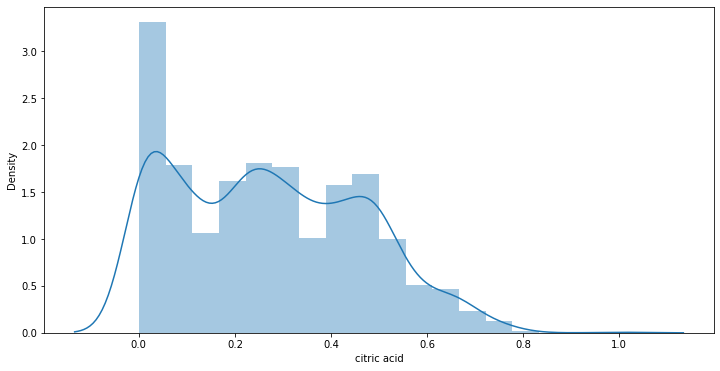

In [68]:
ax = sns.distplot(dados['citric acid'])
ax.figure.set_size_inches(12, 6)
ax

In [69]:
Moda = dados['citric acid'].mode()
Moda

0    0.0
Name: citric acid, dtype: float64

In [70]:
Mediana = dados['citric acid'].median()
Mediana

0.26

In [71]:
Media = dados['citric acid'].mean()
Media

0.2709756097560964

C:\Users\adson.damasceno\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

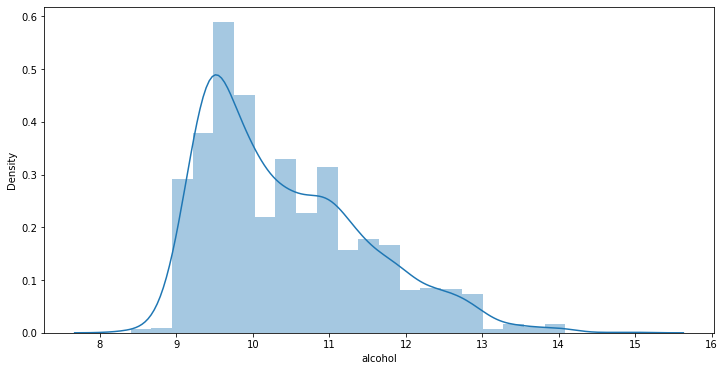

In [72]:
ax = sns.distplot(dados['alcohol'])
ax.figure.set_size_inches(12, 6)
ax

C:\Users\adson.damasceno\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

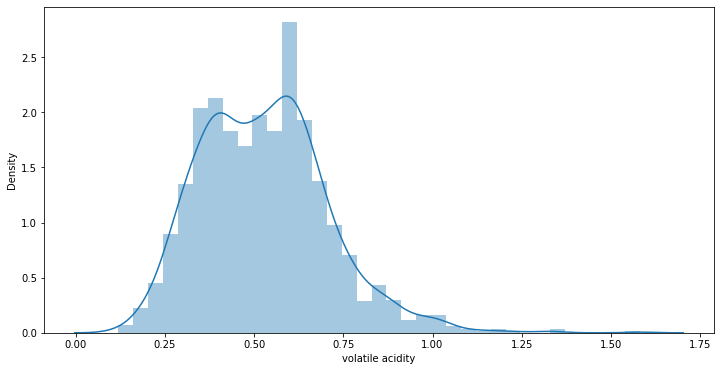

In [73]:
ax = sns.distplot(dados['volatile acidity'])
ax.figure.set_size_inches(12, 6)
ax

# Medidas separatrizes

In [74]:
#cálculo do Quartil
dados.alcohol.quantile([0.25, 0.5, 0.75])

0.25     9.5
0.50    10.2
0.75    11.1
Name: alcohol, dtype: float64

In [75]:
dados.density.quantile([0.25, 0.5, 0.75])

0.25    0.995600
0.50    0.996750
0.75    0.997835
Name: density, dtype: float64

In [76]:
dados['volatile acidity'].quantile([0.25, 0.5, 0.75])

0.25    0.39
0.50    0.52
0.75    0.64
Name: volatile acidity, dtype: float64

In [77]:
dados['citric acid'].quantile([0.25, 0.5, 0.75])

0.25    0.09
0.50    0.26
0.75    0.42
Name: citric acid, dtype: float64

In [78]:
#Cálculo dos percentis
percentil_20 = np.percentile(dados.alcohol, q=range(0,20))
percentil_20

array([8.4, 9. , 9. , 9.1, 9.2, 9.2, 9.2, 9.2, 9.2, 9.3, 9.3, 9.3, 9.3,
       9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.5])

In [79]:
percentil_50 = np.percentile(dados.alcohol, q=range(0,50))
percentil_50

array([ 8.4,  9. ,  9. ,  9.1,  9.2,  9.2,  9.2,  9.2,  9.2,  9.3,  9.3,
        9.3,  9.3,  9.4,  9.4,  9.4,  9.4,  9.4,  9.4,  9.5,  9.5,  9.5,
        9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.6,  9.6,  9.6,  9.6,  9.7,
        9.7,  9.7,  9.8,  9.8,  9.8,  9.8,  9.8,  9.9,  9.9,  9.9, 10. ,
       10. , 10. , 10. , 10.1, 10.1, 10.1])

In [80]:
percentil_70 = np.percentile(dados.alcohol, q=range(0,70))
percentil_70

array([ 8.4,  9. ,  9. ,  9.1,  9.2,  9.2,  9.2,  9.2,  9.2,  9.3,  9.3,
        9.3,  9.3,  9.4,  9.4,  9.4,  9.4,  9.4,  9.4,  9.5,  9.5,  9.5,
        9.5,  9.5,  9.5,  9.5,  9.5,  9.5,  9.6,  9.6,  9.6,  9.6,  9.7,
        9.7,  9.7,  9.8,  9.8,  9.8,  9.8,  9.8,  9.9,  9.9,  9.9, 10. ,
       10. , 10. , 10. , 10.1, 10.1, 10.1, 10.2, 10.2, 10.2, 10.3, 10.3,
       10.4, 10.4, 10.4, 10.5, 10.5, 10.5, 10.5, 10.6, 10.6, 10.7, 10.7,
       10.8, 10.8, 10.9, 10.9])

In [81]:
percentil_20 = np.percentile(dados.density, q=range(0,20))
percentil_20

array([0.99007  , 0.99182  , 0.99258  , 0.9932188, 0.99346  , 0.993598 ,
       0.99378  , 0.9939686, 0.99418  , 0.99438  , 0.994556 , 0.99467  ,
       0.9947552, 0.9948374, 0.9949172, 0.995    , 0.99508  , 0.99516  ,
       0.9952   , 0.9952724])

In [82]:
percentil_50 = np.percentile(dados.density, q=range(0,50))
percentil_50

array([0.99007  , 0.99182  , 0.99258  , 0.9932188, 0.99346  , 0.993598 ,
       0.99378  , 0.9939686, 0.99418  , 0.99438  , 0.994556 , 0.99467  ,
       0.9947552, 0.9948374, 0.9949172, 0.995    , 0.99508  , 0.99516  ,
       0.9952   , 0.9952724, 0.99534  , 0.9954   , 0.99546  , 0.9955   ,
       0.9955452, 0.9956   , 0.9956548, 0.99572  , 0.99576  , 0.9958   ,
       0.99586  , 0.9959   , 0.9959672, 0.996    , 0.9961   , 0.99613  ,
       0.9961628, 0.9962   , 0.99622  , 0.99628  , 0.9963   , 0.9963518,
       0.9964   , 0.9964   , 0.99648  , 0.99652  , 0.99656  , 0.9966   ,
       0.9966504, 0.9967   ])

In [83]:
percentil_70 = np.percentile(dados.density, q=range(0,70))
percentil_70

array([0.99007  , 0.99182  , 0.99258  , 0.9932188, 0.99346  , 0.993598 ,
       0.99378  , 0.9939686, 0.99418  , 0.99438  , 0.994556 , 0.99467  ,
       0.9947552, 0.9948374, 0.9949172, 0.995    , 0.99508  , 0.99516  ,
       0.9952   , 0.9952724, 0.99534  , 0.9954   , 0.99546  , 0.9955   ,
       0.9955452, 0.9956   , 0.9956548, 0.99572  , 0.99576  , 0.9958   ,
       0.99586  , 0.9959   , 0.9959672, 0.996    , 0.9961   , 0.99613  ,
       0.9961628, 0.9962   , 0.99622  , 0.99628  , 0.9963   , 0.9963518,
       0.9964   , 0.9964   , 0.99648  , 0.99652  , 0.99656  , 0.9966   ,
       0.9966504, 0.9967   , 0.99675  , 0.9968   , 0.9968   , 0.99683  ,
       0.99689  , 0.9969   , 0.9969788, 0.997    , 0.9970368, 0.9971   ,
       0.997156 , 0.9972   , 0.9972   , 0.99724  , 0.9973   , 0.99734  ,
       0.99738  , 0.9974   , 0.99745  , 0.99748  ])

In [84]:
percentil_20 = np.percentile(dados['volatile acidity'], q=range(0,20))
percentil_20

array([0.12  , 0.19  , 0.2296, 0.24  , 0.26  , 0.27  , 0.28  , 0.29  ,
       0.3   , 0.305 , 0.31  , 0.315 , 0.32  , 0.33  , 0.34  , 0.34  ,
       0.35  , 0.3566, 0.36  , 0.36  ])

In [85]:
percentil_50 = np.percentile(dados['volatile acidity'], q=range(0,50))
percentil_50

array([0.12  , 0.19  , 0.2296, 0.24  , 0.26  , 0.27  , 0.28  , 0.29  ,
       0.3   , 0.305 , 0.31  , 0.315 , 0.32  , 0.33  , 0.34  , 0.34  ,
       0.35  , 0.3566, 0.36  , 0.36  , 0.37  , 0.3758, 0.38  , 0.38  ,
       0.39  , 0.39  , 0.4   , 0.4   , 0.41  , 0.41  , 0.415 , 0.42  ,
       0.4236, 0.43  , 0.43  , 0.44  , 0.44  , 0.45  , 0.46  , 0.46  ,
       0.47  , 0.48  , 0.48  , 0.49  , 0.49  , 0.5   , 0.5   , 0.5   ,
       0.51  , 0.52  ])

In [86]:
percentil_70 = np.percentile(dados['volatile acidity'], q=range(0,70))
percentil_70

array([0.12  , 0.19  , 0.2296, 0.24  , 0.26  , 0.27  , 0.28  , 0.29  ,
       0.3   , 0.305 , 0.31  , 0.315 , 0.32  , 0.33  , 0.34  , 0.34  ,
       0.35  , 0.3566, 0.36  , 0.36  , 0.37  , 0.3758, 0.38  , 0.38  ,
       0.39  , 0.39  , 0.4   , 0.4   , 0.41  , 0.41  , 0.415 , 0.42  ,
       0.4236, 0.43  , 0.43  , 0.44  , 0.44  , 0.45  , 0.46  , 0.46  ,
       0.47  , 0.48  , 0.48  , 0.49  , 0.49  , 0.5   , 0.5   , 0.5   ,
       0.51  , 0.52  , 0.52  , 0.52  , 0.53  , 0.54  , 0.54  , 0.545 ,
       0.55  , 0.56  , 0.56  , 0.57  , 0.57  , 0.58  , 0.58  , 0.585 ,
       0.59  , 0.59  , 0.6   , 0.6   , 0.6   , 0.61  ])

In [87]:
percentil_20 = np.percentile(dados['citric acid'], q=range(0,20))
percentil_20

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01,
       0.02, 0.02, 0.02, 0.03, 0.03, 0.04, 0.04, 0.05, 0.06])

In [88]:
percentil_50 = np.percentile(dados['citric acid'], q=range(0,50))
percentil_50

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.01 , 0.01 , 0.02 , 0.02 , 0.02 , 0.03 , 0.03 , 0.04 , 0.04 ,
       0.05 , 0.06 , 0.07 , 0.07 , 0.08 , 0.08 , 0.09 , 0.09 , 0.1  ,
       0.1  , 0.11 , 0.12 , 0.124, 0.13 , 0.14 , 0.15 , 0.16 , 0.17 ,
       0.18 , 0.19 , 0.2  , 0.2  , 0.21 , 0.21 , 0.22 , 0.22 , 0.23 ,
       0.24 , 0.24 , 0.24 , 0.25 , 0.25 ])

In [89]:
percentil_70 = np.percentile(dados['citric acid'], q=range(0,70))
percentil_70

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.01 , 0.01 , 0.02 , 0.02 , 0.02 , 0.03 , 0.03 , 0.04 , 0.04 ,
       0.05 , 0.06 , 0.07 , 0.07 , 0.08 , 0.08 , 0.09 , 0.09 , 0.1  ,
       0.1  , 0.11 , 0.12 , 0.124, 0.13 , 0.14 , 0.15 , 0.16 , 0.17 ,
       0.18 , 0.19 , 0.2  , 0.2  , 0.21 , 0.21 , 0.22 , 0.22 , 0.23 ,
       0.24 , 0.24 , 0.24 , 0.25 , 0.25 , 0.26 , 0.26 , 0.26 , 0.27 ,
       0.28 , 0.29 , 0.3  , 0.3  , 0.31 , 0.31 , 0.32 , 0.32 , 0.33 ,
       0.33 , 0.34 , 0.35 , 0.36 , 0.37 , 0.38 , 0.39 ])

# Criando boxplot

<AxesSubplot:title={'center':'density'}, xlabel='g/mL'>

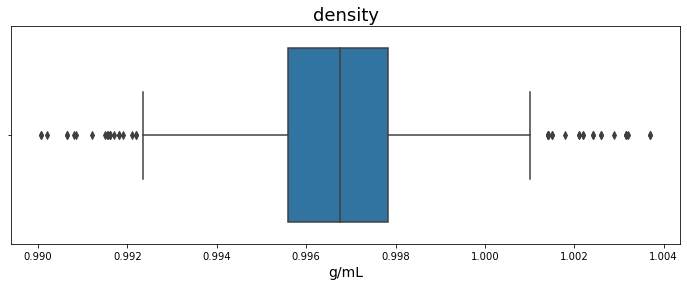

In [90]:
#gerando boxplot
ax = sns.boxplot( x = 'density' , data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('density', fontsize=18)
ax.set_xlabel('g/mL', fontsize=14)
ax


<AxesSubplot:title={'center':'density'}, xlabel='g/mL', ylabel='quality'>

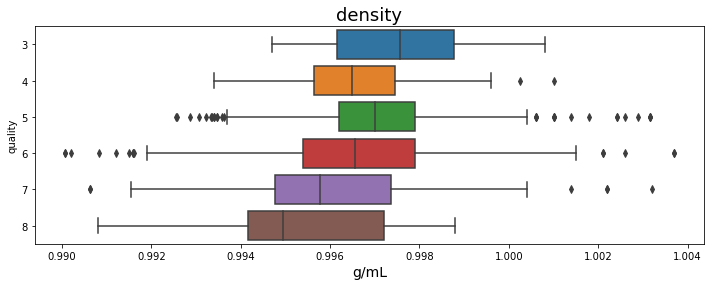

In [91]:
ax = sns.boxplot( x = 'density', y = 'quality', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('density', fontsize=18)
ax.set_xlabel('g/mL', fontsize=14)
ax

<AxesSubplot:title={'center':'citric acid'}, xlabel='g/cm³'>

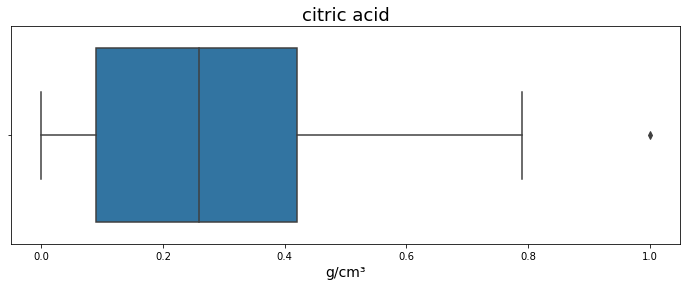

In [92]:
ax = sns.boxplot( x = 'citric acid', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('citric acid', fontsize=18)
ax.set_xlabel('g/cm³', fontsize=14)
ax

<AxesSubplot:title={'center':'volatile acidity'}, xlabel='gr/l'>

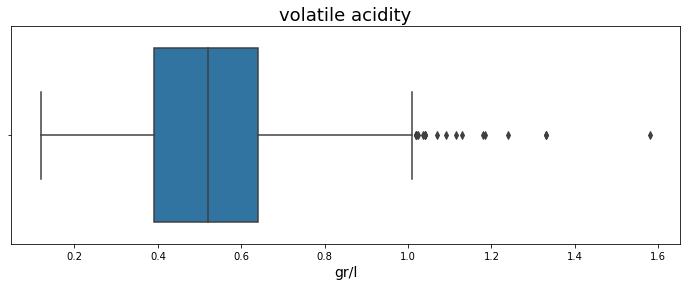

In [93]:
ax = sns.boxplot( x = 'volatile acidity', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('volatile acidity', fontsize=18)
ax.set_xlabel('gr/l', fontsize=14)
ax

<AxesSubplot:title={'center':'alcohol'}, xlabel='mL'>

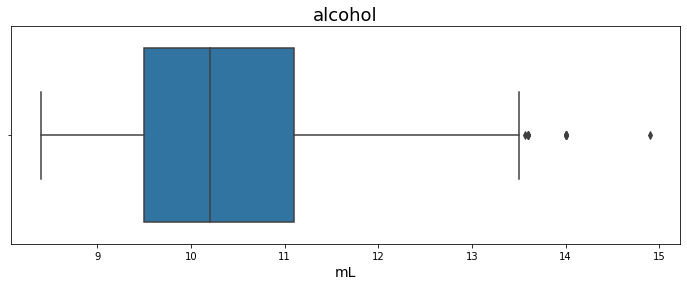

In [95]:
ax = sns.boxplot( x = 'alcohol', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('alcohol', fontsize=18)
ax.set_xlabel('mL', fontsize=14)
ax

# Gerar gráficos scatter

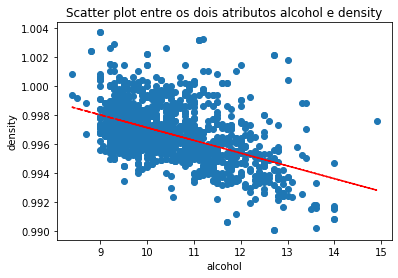

In [96]:
import matplotlib.pyplot as plt

dados.plot.scatter(x='alcohol', y='density', title= "Scatter plot entre os dois atributos alcohol e density")

x = dados['alcohol']
y = dados['density']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

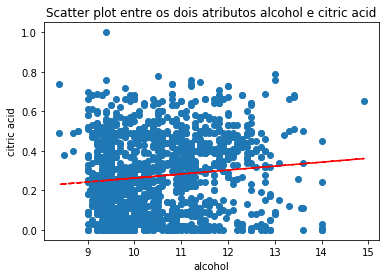

In [97]:
dados.plot.scatter(x='alcohol', y='citric acid', title= "Scatter plot entre os dois atributos alcohol e citric acid")

x = dados['alcohol']
y = dados['citric acid']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

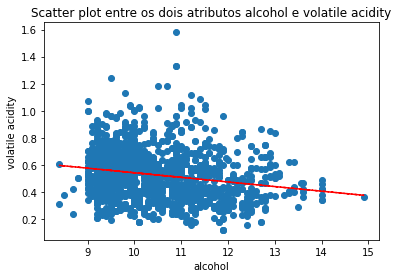

In [98]:
dados.plot.scatter(x='alcohol', y='volatile acidity', title= "Scatter plot entre os dois atributos alcohol e volatile acidity")

x = dados['alcohol']
y = dados['volatile acidity']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

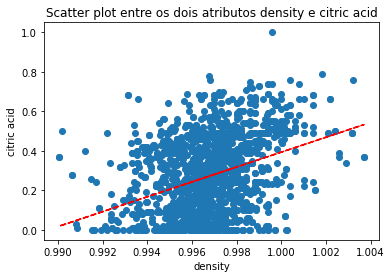

In [99]:
dados.plot.scatter(x='density', y='citric acid', title= "Scatter plot entre os dois atributos density e citric acid")

x = dados['density']
y = dados['citric acid']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

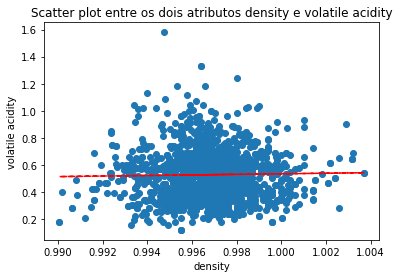

In [100]:
dados.plot.scatter(x='density', y='volatile acidity', title= "Scatter plot entre os dois atributos density e volatile acidity")

x = dados['density']
y = dados['volatile acidity']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

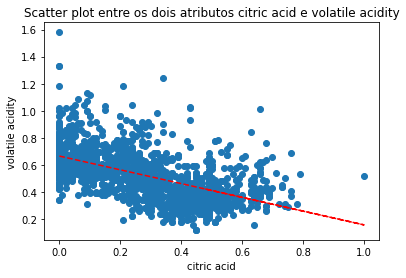

In [101]:
dados.plot.scatter(x='citric acid', y='volatile acidity', title= "Scatter plot entre os dois atributos citric acid e volatile acidity")

x = dados['citric acid']
y = dados['volatile acidity']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

# Matriz de correlação e covariância

In [102]:
# criando uma matriz X com os valores do data frame
X = dados.iloc[:,1:-1].values # exceto a coluna dos IDs e da classe

# matriz de covariancia
covariance = np.cov(X, rowvar=False)

# matriz de correlação
correlation = np.corrcoef(X, rowvar=False)

print('Matriz de covariância: ')
covariance_pd = pd.DataFrame(covariance)
display(covariance_pd)

print('\n\nMatriz de correlação: ')
correlation_pd = pd.DataFrame(correlation)
display(correlation_pd)

Matriz de covariância: 


,0,1,2,3,4,5,6,7,8,9
0,0.032062,-0.019272,0.000484,0.000517,-0.019674,0.450426,0.000007,0.006495,-0.007921,-0.038600
1,-0.019272,0.037947,0.039434,0.001869,-0.124252,0.227697,0.000134,-0.016298,0.010328,0.022815
2,0.000484,0.039434,1.987897,0.003690,2.758611,9.416441,0.000945,-0.018644,0.001321,0.063219
3,0.000517,0.001869,0.003690,0.002215,0.002738,0.073387,0.000018,-0.001926,0.002962,-0.011092
4,-0.019674,-0.124252,2.758611,0.002738,109.414884,229.737521,-0.000433,0.113653,0.091592,-0.773698
5,0.450426,0.227697,9.416441,0.073387,229.737521,1082.102373,0.004425,-0.337699,0.239471,-7.209298
6,0.000007,0.000134,0.000945,0.000018,-0.000433,0.004425,0.000004,-0.000100,0.000048,-0.000998
7,0.006495,-0.016298,-0.018644,-0.001926,0.113653,-0.337699,-0.000100,0.023835,-0.005146,0.033832
8,-0.007921,0.010328,0.001321,0.002962,0.091592,0.239471,0.000048,-0.005146,0.028733,0.016907
9,-0.038600,0.022815,0.063219,-0.011092,-0.773698,-7.209298,-0.000998,0.033832,0.016907,1.135647




Matriz de correlação: 


,0,1,2,3,4,5,6,7,8,9
0,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
1,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
2,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
3,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
4,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
5,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
6,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
7,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
8,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595
9,-0.202288,0.109903,0.042075,-0.221141,-0.069408,-0.205654,-0.496180,0.205633,0.093595,1.000000
